In [ ]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
captura = pd.read_csv('captura de atun camaron tiburon y langosta.csv')
poblacion_Cost = pd.read_csv('crecimiento poblacional en zona costera.csv')
ballenas = pd.read_csv('embarcaciones en zonas con presencia de ballenas.csv')
mortalidad = pd.read_csv('mortalidad de delfines por lance pesquero.csv')
pesc_ballenas = pd.read_csv('pesca en zonas con presencia de ballenas.csv')

In [ ]:
captura

,AÑO,PESQUERIA,CAPTURA_(TONELADAS)
0,1995,Atun,108224
1,1995,Camaron,70034
2,1995,Langosta,2317
3,1995,Tiburon,21502
4,1996,Atun,129415
...,...,...,...
87,2016,Tiburon,33728
88,2017,Atun,97069
89,2017,Camaron,227929
90,2017,Langosta,5190


In [ ]:
df_cap = captura[captura['PESQUERIA'] == 'Atun']

In [ ]:
df_cap

,AÑO,PESQUERIA,CAPTURA_(TONELADAS)
0,1995,Atun,108224
4,1996,Atun,129415
8,1997,Atun,141167
12,1998,Atun,117823
16,1999,Atun,124012
20,2000,Atun,103655
24,2001,Atun,133288
28,2002,Atun,151026
32,2003,Atun,166875
36,2004,Atun,108326


In [ ]:
#df_cap = df_cap.set_index('AÑO')
#df_cap

In [ ]:
dropIndex = [84, 88]
df_cap = df_cap.drop(dropIndex)

In [ ]:
df_cap

,AÑO,PESQUERIA,CAPTURA_(TONELADAS)
0,1995,Atun,108224
4,1996,Atun,129415
8,1997,Atun,141167
12,1998,Atun,117823
16,1999,Atun,124012
20,2000,Atun,103655
24,2001,Atun,133288
28,2002,Atun,151026
32,2003,Atun,166875
36,2004,Atun,108326


In [ ]:
poblacion_Cost

,PERIODO,TASA_ANUAL_DE_CAMBIO_(PORCENTAJE)
0,1990-1995,2.825595
1,1995-2000,1.590691
2,2000-2005,1.394728
3,2005-2010,1.947861
4,2010-2015,1.378763
5,1990-2015,1.826104


In [ ]:
poblacion_Cost = poblacion_Cost.drop(5)

In [ ]:
poblacion_Cost

,PERIODO,TASA_ANUAL_DE_CAMBIO_(PORCENTAJE)
0,1990-1995,2.825595
1,1995-2000,1.590691
2,2000-2005,1.394728
3,2005-2010,1.947861
4,2010-2015,1.378763


In [ ]:
poblacion_Cost[['StartYear', 'EndYear']] = poblacion_Cost['PERIODO'].str.split('-', expand=True)
poblacion_Cost['StartYear'] = pd.to_numeric(poblacion_Cost['StartYear'])
poblacion_Cost['EndYear'] = pd.to_numeric(poblacion_Cost['EndYear'])

pobExpandYears = pd.concat([pd.DataFrame({'PERIODO': range(start, end + 1), 'TASA_ANUAL_DE_CAMBIO_(PORCENTAJE)': value})
for start, end, value in zip(poblacion_Cost['StartYear'], poblacion_Cost['EndYear'], poblacion_Cost['TASA_ANUAL_DE_CAMBIO_(PORCENTAJE)'])], ignore_index=True)


In [ ]:
columnsNewName = ['AÑO', 'TASA_ANUAL_DE_CAMBIO']
pobExpandYears.columns = columnsNewName

In [ ]:
pobExpandYears

,AÑO,TASA_ANUAL_DE_CAMBIO
0,1990,2.825595
1,1991,2.825595
2,1992,2.825595
3,1993,2.825595
4,1994,2.825595
5,1995,2.825595
6,1995,1.590691
7,1996,1.590691
8,1997,1.590691
9,1998,1.590691


In [ ]:
dropIndex = [5,11,17,23]
pobExpandYears = pobExpandYears.drop(dropIndex)

In [ ]:
pobExpandYears

,AÑO,TASA_ANUAL_DE_CAMBIO
0,1990,2.825595
1,1991,2.825595
2,1992,2.825595
3,1993,2.825595
4,1994,2.825595
6,1995,1.590691
7,1996,1.590691
8,1997,1.590691
9,1998,1.590691
10,1999,1.590691


In [ ]:
#pobExpandYears = pobExpandYears.set_index('AÑO')


In [ ]:
pobExpandYears

,AÑO,TASA_ANUAL_DE_CAMBIO
0,1990,2.825595
1,1991,2.825595
2,1992,2.825595
3,1993,2.825595
4,1994,2.825595
6,1995,1.590691
7,1996,1.590691
8,1997,1.590691
9,1998,1.590691
10,1999,1.590691


In [ ]:
dropIndex = [0,1,2,3,4]
pobExpandYears = pobExpandYears.drop(dropIndex)


In [ ]:
pobExpandYears

,AÑO,TASA_ANUAL_DE_CAMBIO
6,1995,1.590691
7,1996,1.590691
8,1997,1.590691
9,1998,1.590691
10,1999,1.590691
12,2000,1.394728
13,2001,1.394728
14,2002,1.394728
15,2003,1.394728
16,2004,1.394728


In [ ]:
ballenas

,AÑO,ENTIDAD_FEDERATIVA,EMBARCACIONES_(NUMERO),Unnamed: 3
0,1989,Baja California,2487,23700.0
1,1989,Baja California Sur,2258,NaN
2,1989,Jalisco,2594,NaN
3,1989,Oaxaca,2702,NaN
4,1989,Nayarit,2003,NaN
...,...,...,...,...
198,2017,Jalisco,4437,NaN
199,2017,Oaxaca,1979,NaN
200,2017,Nayarit,2122,NaN
201,2017,Sinaloa,11260,NaN


In [ ]:
del ballenas['Unnamed: 3']

In [ ]:
ballenas

,AÑO,ENTIDAD_FEDERATIVA,EMBARCACIONES_(NUMERO)
0,1989,Baja California,2487
1,1989,Baja California Sur,2258
2,1989,Jalisco,2594
3,1989,Oaxaca,2702
4,1989,Nayarit,2003
...,...,...,...
198,2017,Jalisco,4437
199,2017,Oaxaca,1979
200,2017,Nayarit,2122
201,2017,Sinaloa,11260


In [ ]:
ballenas['EMBARCACIONES_(NUMERO)'] = pd.to_numeric(ballenas['EMBARCACIONES_(NUMERO)'], errors='coerce')
ballenasGeneral = ballenas.groupby('AÑO')['EMBARCACIONES_(NUMERO)'].sum().reset_index()


In [ ]:
ballenasGeneral

,AÑO,EMBARCACIONES_(NUMERO)
0,1989,23700.0
1,1990,23726.0
2,1991,23690.0
3,1992,23859.0
4,1993,23897.0
5,1994,24002.0
6,1995,25260.0
7,1996,24640.0
8,1997,35349.0
9,1998,38295.0


In [ ]:
#ballenasGeneral=ballenasGeneral.set_index('AÑO')

In [ ]:
ballenasGeneral


,AÑO,EMBARCACIONES_(NUMERO)
0,1989,23700.0
1,1990,23726.0
2,1991,23690.0
3,1992,23859.0
4,1993,23897.0
5,1994,24002.0
6,1995,25260.0
7,1996,24640.0
8,1997,35349.0
9,1998,38295.0


In [ ]:
dropIndex = [0,1,2,3,4,5,27,28]
ballenasGeneral = ballenasGeneral.drop(dropIndex)

In [ ]:
ballenasGeneral

,AÑO,EMBARCACIONES_(NUMERO)
6,1995,25260.0
7,1996,24640.0
8,1997,35349.0
9,1998,38295.0
10,1999,35357.0
11,2000,38698.0
12,2001,38732.0
13,2002,38739.0
14,2003,38750.0
15,2004,38749.0


In [ ]:
mortalidad

,AÑO,DELFINES_MUERTOS_(NUMERO),TASA_DE_MORTALIDAD_(DELFINES_MUERTOS_POR_LANCE_PESQUERO)
0,1992,9562,1.91
1,1993,1909,0.69
2,1994,1830,0.43
3,1995,1696,0.46
4,1996,1287,0.37
5,1997,1485,0.35
6,1998,946,0.21
7,1999,750,0.18
8,2000,775,0.18
9,2001,657,0.16


In [ ]:
dropIndex = [0,1,2,24,25]
mortalidad = mortalidad.drop(dropIndex)
mortalidad

,AÑO,DELFINES_MUERTOS_(NUMERO),TASA_DE_MORTALIDAD_(DELFINES_MUERTOS_POR_LANCE_PESQUERO)
3,1995,1696,0.46
4,1996,1287,0.37
5,1997,1485,0.35
6,1998,946,0.21
7,1999,750,0.18
8,2000,775,0.18
9,2001,657,0.16
10,2002,680,0.14
11,2003,726,0.12
12,2004,591,0.12


In [ ]:
#mortalidad = mortalidad.set_index('AÑO')

In [ ]:
mortalidad

,AÑO,DELFINES_MUERTOS_(NUMERO),TASA_DE_MORTALIDAD_(DELFINES_MUERTOS_POR_LANCE_PESQUERO)
3,1995,1696,0.46
4,1996,1287,0.37
5,1997,1485,0.35
6,1998,946,0.21
7,1999,750,0.18
8,2000,775,0.18
9,2001,657,0.16
10,2002,680,0.14
11,2003,726,0.12
12,2004,591,0.12


In [ ]:
pesc_ballenas

,AÑO,CAPTURA_PESQUERA_(TONELADAS)
0,1990,911546
1,1991,912453
2,1992,684363
3,1993,620176
4,1994,680882
5,1995,841179
6,1996,972225
7,1997,1022473
8,1998,719007
9,1999,791091


In [ ]:
dropIndex = [0,1,2,3,4,26,27]
pesc_ballenas = pesc_ballenas.drop(dropIndex)
pesc_ballenas

,AÑO,CAPTURA_PESQUERA_(TONELADAS)
5,1995,841179
6,1996,972225
7,1997,1022473
8,1998,719007
9,1999,791091
10,2000,910018
11,2001,1031379
12,2002,1091020
13,2003,1057278
14,2004,963775


In [ ]:
#pesc_ballenas = pesc_ballenas.set_index('AÑO')

In [ ]:
pesc_ballenas

,AÑO,CAPTURA_PESQUERA_(TONELADAS)
5,1995,841179
6,1996,972225
7,1997,1022473
8,1998,719007
9,1999,791091
10,2000,910018
11,2001,1031379
12,2002,1091020
13,2003,1057278
14,2004,963775


In [ ]:
#df_cap, pobExpandYears, ballenasGeneral, mortalidad, pesc_ballenas
df = pd.merge(df_cap,pobExpandYears,on='AÑO')

In [ ]:
df = pd.merge(df,ballenasGeneral, on='AÑO')

In [ ]:
df=pd.merge(df,mortalidad,on='AÑO')

In [ ]:
df=pd.merge(df,pesc_ballenas,on='AÑO')

In [ ]:
df = df.set_index('AÑO')
df


,PESQUERIA,CAPTURA_(TONELADAS),TASA_ANUAL_DE_CAMBIO,EMBARCACIONES_(NUMERO),DELFINES_MUERTOS_(NUMERO),TASA_DE_MORTALIDAD_(DELFINES_MUERTOS_POR_LANCE_PESQUERO),CAPTURA_PESQUERA_(TONELADAS)
AÑO,,,,,,,
1995,Atun,108224,1.590691,25260.0,1696,0.46,841179
1996,Atun,129415,1.590691,24640.0,1287,0.37,972225
1997,Atun,141167,1.590691,35349.0,1485,0.35,1022473
1998,Atun,117823,1.590691,38295.0,946,0.21,719007
1999,Atun,124012,1.590691,35357.0,750,0.18,791091
2000,Atun,103655,1.394728,38698.0,775,0.18,910018
2001,Atun,133288,1.394728,38732.0,657,0.16,1031379
2002,Atun,151026,1.394728,38739.0,680,0.14,1091020
2003,Atun,166875,1.394728,38750.0,726,0.12,1057278


In [ ]:
correlation = df.corr()

<ipython-input-46-bbce1ddb6927>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [ ]:
correlation

,CAPTURA_(TONELADAS),TASA_ANUAL_DE_CAMBIO,EMBARCACIONES_(NUMERO),DELFINES_MUERTOS_(NUMERO),TASA_DE_MORTALIDAD_(DELFINES_MUERTOS_POR_LANCE_PESQUERO),CAPTURA_PESQUERA_(TONELADAS)
CAPTURA_(TONELADAS),1.000000,-0.538560,-0.016891,0.252987,0.119318,-0.288716
TASA_ANUAL_DE_CAMBIO,-0.538560,1.000000,0.329744,-0.102964,0.036352,0.162124
EMBARCACIONES_(NUMERO),-0.016891,0.329744,1.000000,-0.427806,-0.363449,0.008121
DELFINES_MUERTOS_(NUMERO),0.252987,-0.102964,-0.427806,1.000000,0.953250,-0.327382
TASA_DE_MORTALIDAD_(DELFINES_MUERTOS_POR_LANCE_PESQUERO),0.119318,0.036352,-0.363449,0.953250,1.000000,-0.340882
CAPTURA_PESQUERA_(TONELADAS),-0.288716,0.162124,0.008121,-0.327382,-0.340882,1.000000


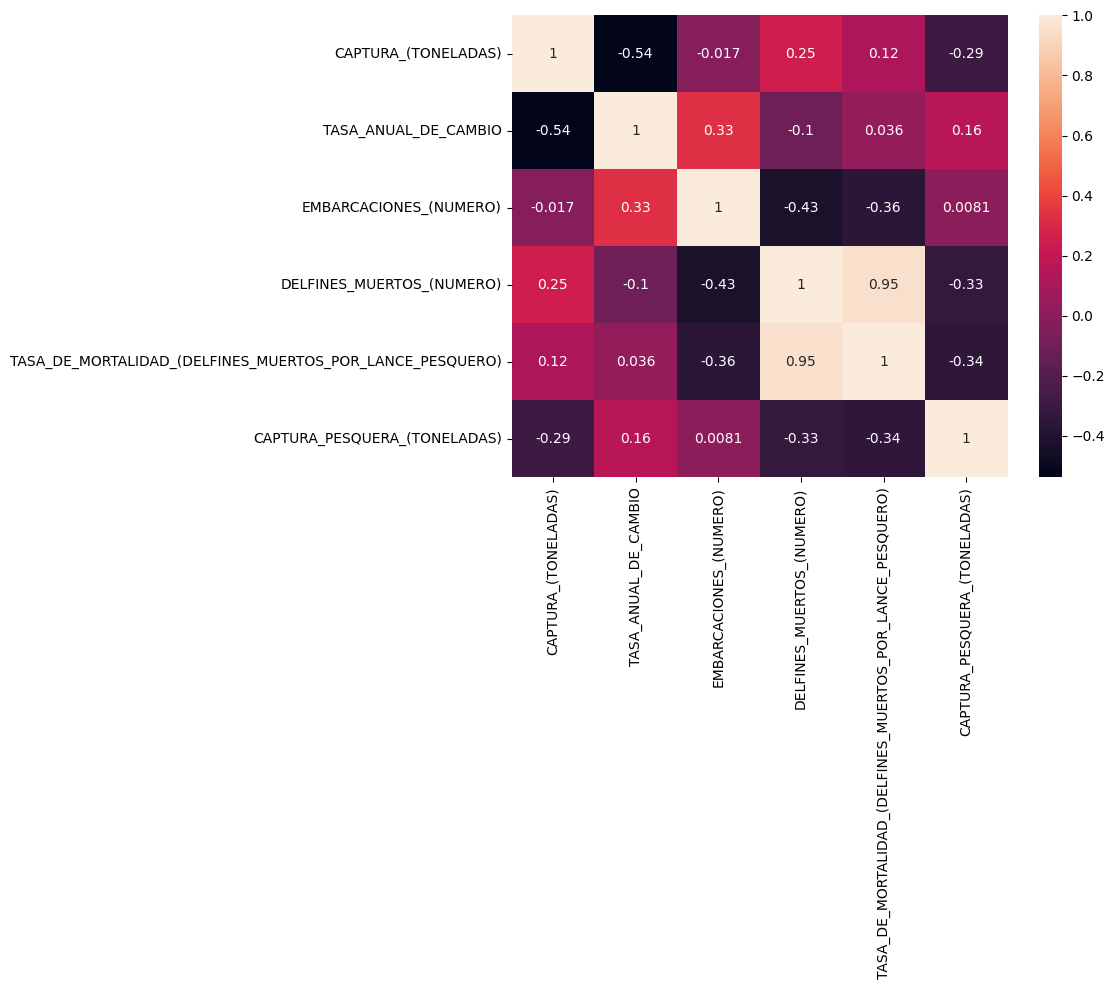

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
del df['TASA_DE_MORTALIDAD_(DELFINES_MUERTOS_POR_LANCE_PESQUERO)']

In [ ]:
df

,PESQUERIA,CAPTURA_(TONELADAS),TASA_ANUAL_DE_CAMBIO,EMBARCACIONES_(NUMERO),DELFINES_MUERTOS_(NUMERO),CAPTURA_PESQUERA_(TONELADAS)
AÑO,,,,,,
1995,Atun,108224,1.590691,25260.0,1696,841179
1996,Atun,129415,1.590691,24640.0,1287,972225
1997,Atun,141167,1.590691,35349.0,1485,1022473
1998,Atun,117823,1.590691,38295.0,946,719007
1999,Atun,124012,1.590691,35357.0,750,791091
2000,Atun,103655,1.394728,38698.0,775,910018
2001,Atun,133288,1.394728,38732.0,657,1031379
2002,Atun,151026,1.394728,38739.0,680,1091020
2003,Atun,166875,1.394728,38750.0,726,1057278


In [ ]:
correlation = df.corr()

<ipython-input-51-bbce1ddb6927>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [ ]:
newIndex = ['PESQUERIA', 'CAPTURA_TONELADAS', 'TAZA_CAMBIO_POB', 'EMBARCACIONES_BALL', 'DELFINES_MUERTOS', 'CAPTURA_BALL']
df.columns = newIndex
df

,PESQUERIA,CAPTURA_TONELADAS,TAZA_CAMBIO_POB,EMBARCACIONES_BALL,DELFINES_MUERTOS,CAPTURA_BALL
AÑO,,,,,,
1995,Atun,108224,1.590691,25260.0,1696,841179
1996,Atun,129415,1.590691,24640.0,1287,972225
1997,Atun,141167,1.590691,35349.0,1485,1022473
1998,Atun,117823,1.590691,38295.0,946,719007
1999,Atun,124012,1.590691,35357.0,750,791091
2000,Atun,103655,1.394728,38698.0,775,910018
2001,Atun,133288,1.394728,38732.0,657,1031379
2002,Atun,151026,1.394728,38739.0,680,1091020
2003,Atun,166875,1.394728,38750.0,726,1057278


In [ ]:
del df['PESQUERIA']

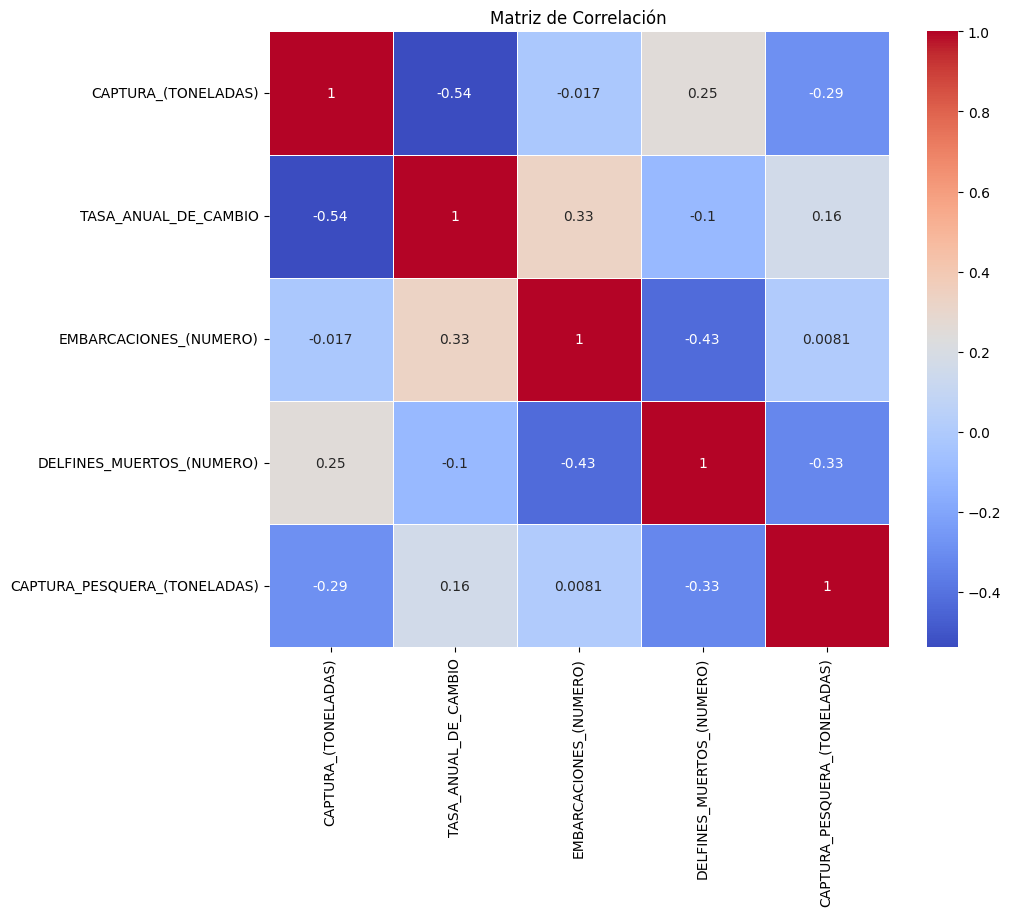

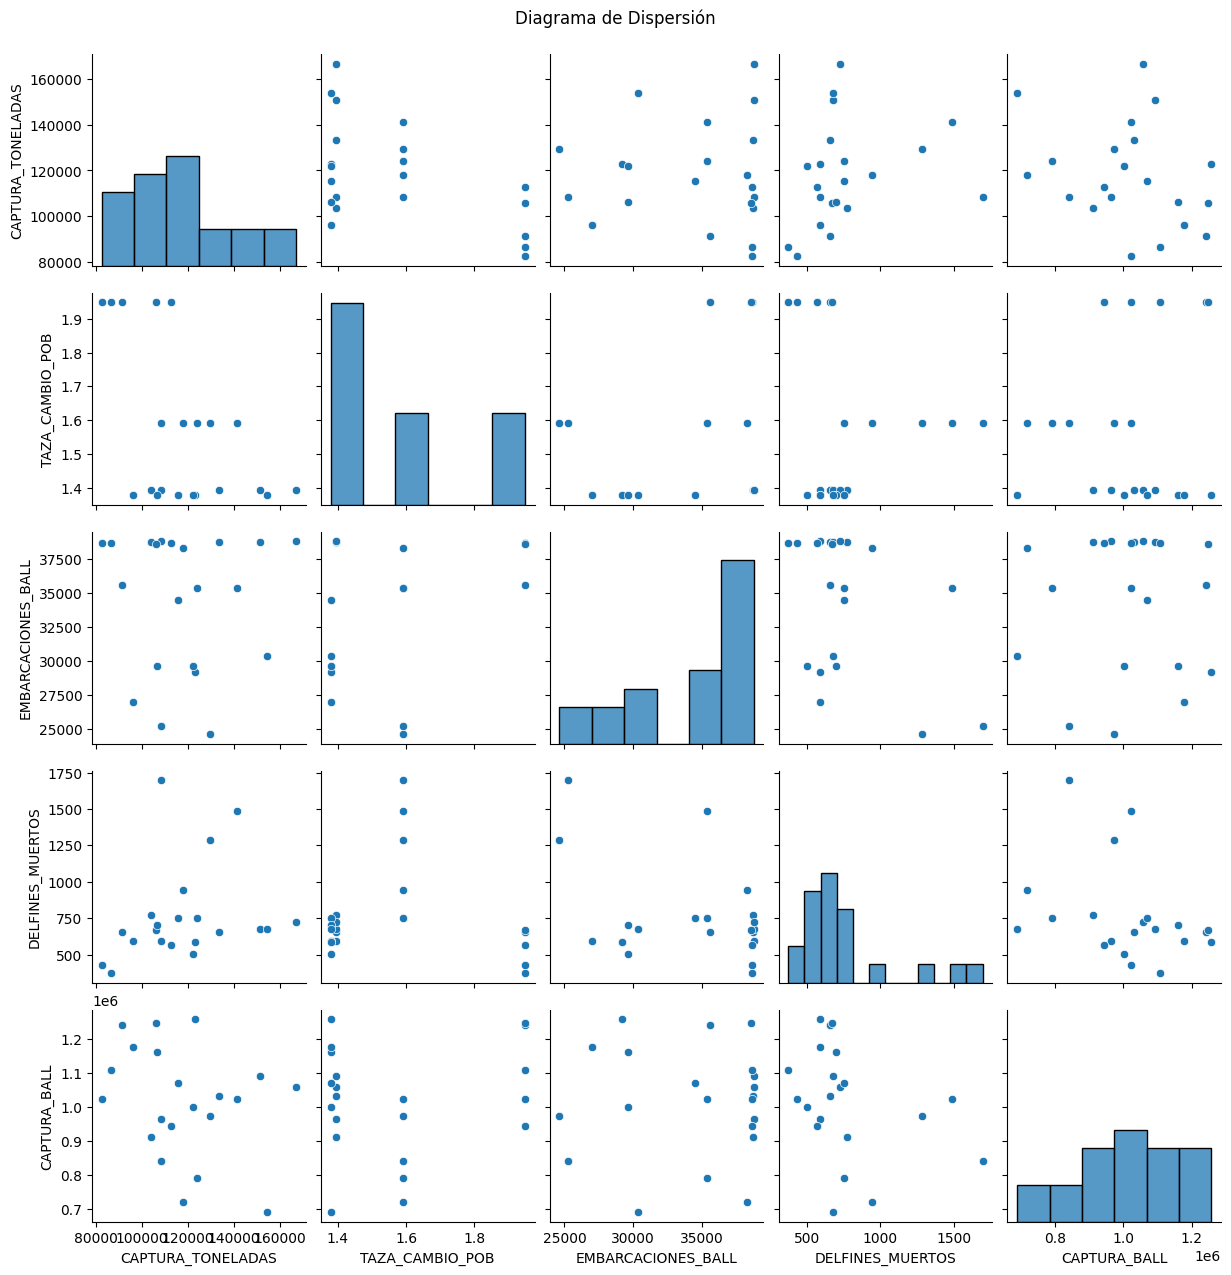

In [ ]:
# Crear un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

# Crear un diagrama de dispersión (scatter plot matrix)
sns.pairplot(df)
plt.suptitle('Diagrama de Dispersión', y=1.02)
plt.show()

#Proceso de machine learning utilizando ARIMAX

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

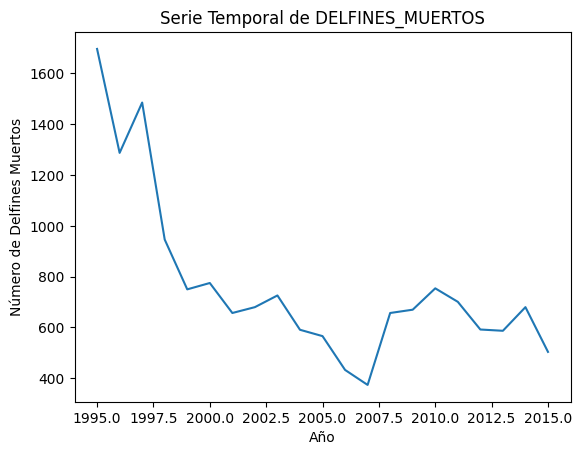

In [ ]:
plt.plot(df['DELFINES_MUERTOS'])
plt.title('Serie Temporal de DELFINES_MUERTOS')
plt.xlabel('Año')
plt.ylabel('Número de Delfines Muertos')
plt.show()

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df['DELFINES_MUERTOS'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

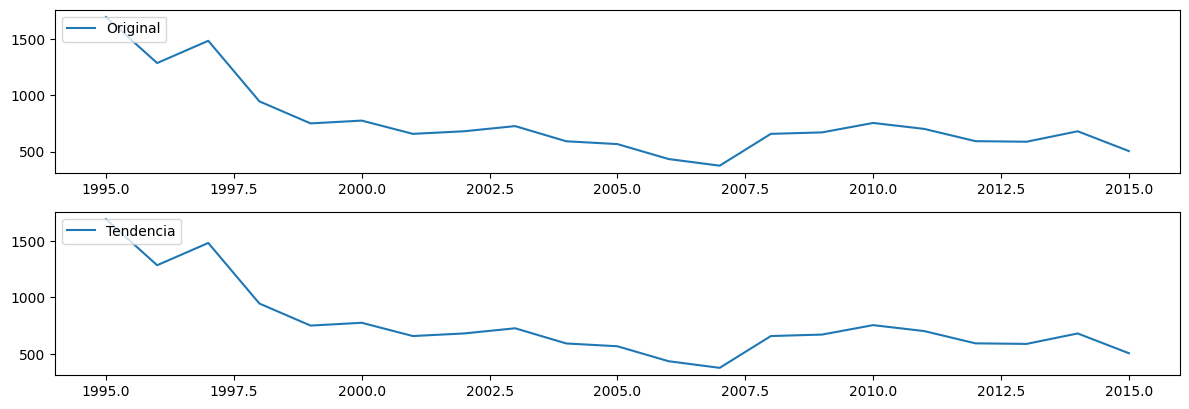

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['DELFINES_MUERTOS'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)|
plt.plot(trend, label='Tendencia')
plt.legend(loc='upper left')


plt.tight_layout()
plt.show()


In [ ]:
result = sm.tsa.adfuller(df['DELFINES_MUERTOS'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.4327231616820963
p-value: 0.009892655634608952
Critical Values: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}


In [ ]:
if result[1] > 0.05:
    df['DELFINES_MUERTOS_diff'] = df['DELFINES_MUERTOS'].diff().dropna()
else:
    df['DELFINES_MUERTOS_diff'] = df['DELFINES_MUERTOS']

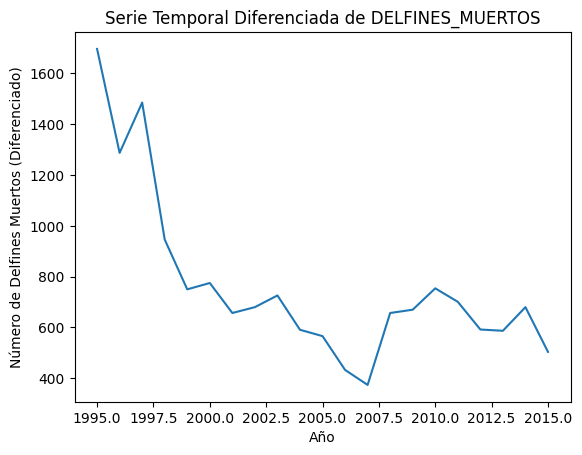

In [ ]:
plt.plot(df['DELFINES_MUERTOS_diff'])
plt.title('Serie Temporal Diferenciada de DELFINES_MUERTOS')
plt.xlabel('Año')
plt.ylabel('Número de Delfines Muertos (Diferenciado)')
plt.show()

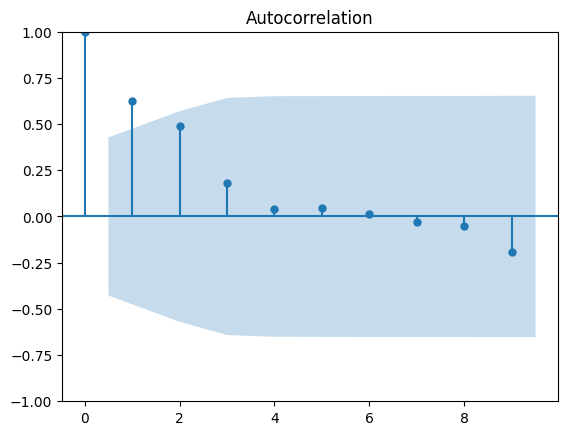

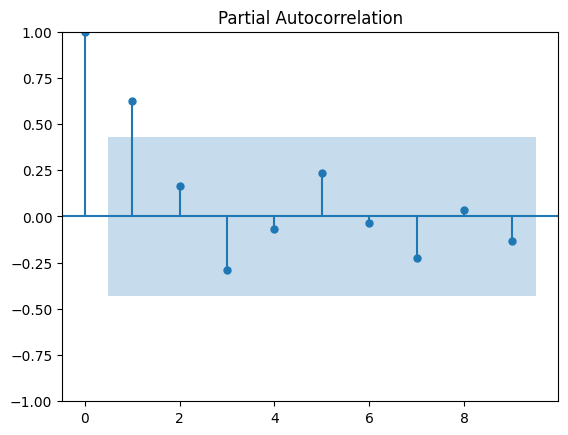

In [ ]:
# Funciones de Autocorrelación y Autocorrelación Parcial
plot_acf(df['DELFINES_MUERTOS_diff'].dropna(), lags=9)  # Ajusta el número de lags según sea necesario
plot_pacf(df['DELFINES_MUERTOS_diff'].dropna(), lags=9)  # Ajusta el número de lags según sea necesario
plt.show()

In [ ]:
model = ARIMA(df['DELFINES_MUERTOS_diff'].dropna(), order=(1, 1, 1))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Obtener las predicciones
forecast_steps = 10  # Puedes ajustar el número de pasos a predecir
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = range(df.index.max() + 1, df.index.max() + 1 + forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


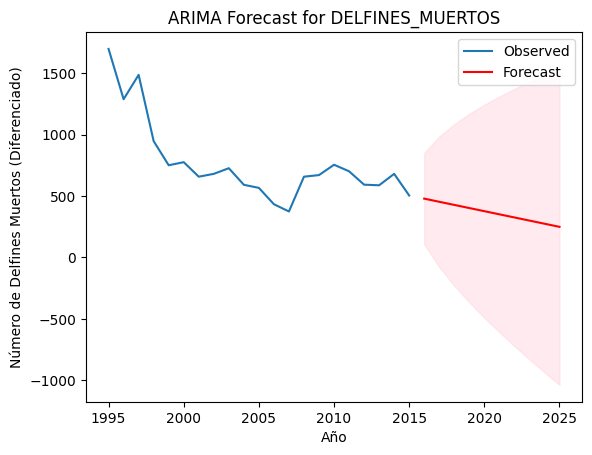

In [ ]:
plt.plot(df['DELFINES_MUERTOS_diff'], label='Observed')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int()['lower DELFINES_MUERTOS_diff'], forecast.conf_int()['upper DELFINES_MUERTOS_diff'], color='pink', alpha=0.3)
plt.title('ARIMA Forecast for DELFINES_MUERTOS')
plt.xlabel('Año')
plt.ylabel('Número de Delfines Muertos (Diferenciado)')
plt.legend()
plt.show()

#**Modelo de aprendizaje regresion multivariable**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X = df[['TAZA_CAMBIO_POB', 'EMBARCACIONES_BALL', 'CAPTURA_BALL','CAPTURA_TONELADAS']]
y = df['DELFINES_MUERTOS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 337758.218807449
R2 Score: -0.9450830120350282


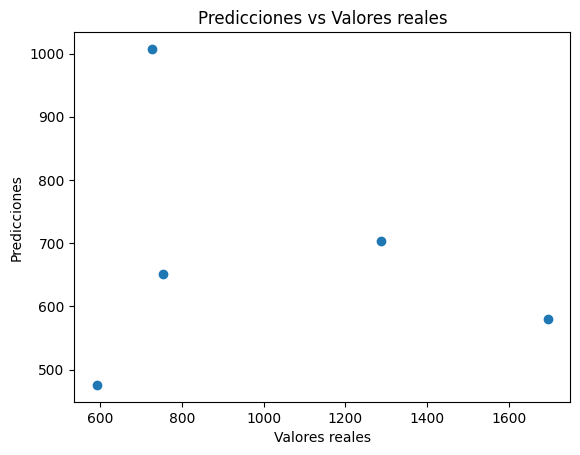

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()